# DNSC 6314 - MACHINE LEARNING 1

# Group Assignment 1
#### Abdul Haleem Abdul Salam,  Anna Falcione and Lizzy Li

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

### Capital Bikeshare Data
We are dealing with data from Feb 2023 to June 2023. The data was accessed from the publically available capital bikeshare data.
https://ride.capitalbikeshare.com/system-data

##### Reading the data

In [2]:
df_Feb=pd.read_csv('202302-captialbikeshare-tripdata.csv')
df_Mar=pd.read_csv('202303-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('202304-capitalbikeshare-tripdata.csv')
df_May=pd.read_csv('202305-capitalbikeshare-tripdata.csv')
df_Jun=pd.read_csv('202306-capitalbikeshare-tripdata.csv')

##### Merging the datasets

In [3]:
df=pd.concat([df_Feb,df_Mar,df_Apr,df_May,df_Jun])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749886 entries, 0 to 430669
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 186.9+ MB


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6D7F3F3DDD864A41,classic_bike,2023-02-04 21:08:26,2023-02-04 21:16:39,New Jersey Ave & N St NW/Dunbar HS,31636.0,8th & V St NW,31134.0,38.907333,-77.015360,38.917716,-77.022684,member
1,1B4FD92511BA8869,classic_bike,2023-02-28 18:24:01,2023-02-28 18:28:46,11th & Girard St NW,31126.0,8th & V St NW,31134.0,38.925636,-77.027112,38.917716,-77.022684,member
2,E215D5A904EC376F,classic_bike,2023-02-12 14:03:48,2023-02-12 14:05:44,3rd & H St NW,31604.0,1st & H St NW,31638.0,38.899408,-77.015289,38.900358,-77.012108,member
3,AF176FEC3204AEB5,classic_bike,2023-02-08 19:25:13,2023-02-08 19:33:08,7th St & Florida Ave NW,31109.0,7th & F St NW / National Portrait Gallery,31232.0,38.916137,-77.022003,38.897283,-77.022191,member
4,CB8BE52EB8F58E80,classic_bike,2023-02-27 14:48:59,2023-02-27 14:54:10,8th & V St NW,31134.0,8th & V St NW,31134.0,38.917716,-77.022684,38.917716,-77.022684,member


### Dealing with time and date

In [5]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,6D7F3F3DDD864A41,classic_bike,2023-02-04 21:08:26,2023-02-04 21:16:39,New Jersey Ave & N St NW/Dunbar HS,31636.0,8th & V St NW,31134.0,38.907333,-77.015360,38.917716,-77.022684,member,2023-02-04,2023-02-04
1,1B4FD92511BA8869,classic_bike,2023-02-28 18:24:01,2023-02-28 18:28:46,11th & Girard St NW,31126.0,8th & V St NW,31134.0,38.925636,-77.027112,38.917716,-77.022684,member,2023-02-28,2023-02-28
2,E215D5A904EC376F,classic_bike,2023-02-12 14:03:48,2023-02-12 14:05:44,3rd & H St NW,31604.0,1st & H St NW,31638.0,38.899408,-77.015289,38.900358,-77.012108,member,2023-02-12,2023-02-12
3,AF176FEC3204AEB5,classic_bike,2023-02-08 19:25:13,2023-02-08 19:33:08,7th St & Florida Ave NW,31109.0,7th & F St NW / National Portrait Gallery,31232.0,38.916137,-77.022003,38.897283,-77.022191,member,2023-02-08,2023-02-08
4,CB8BE52EB8F58E80,classic_bike,2023-02-27 14:48:59,2023-02-27 14:54:10,8th & V St NW,31134.0,8th & V St NW,31134.0,38.917716,-77.022684,38.917716,-77.022684,member,2023-02-27,2023-02-27


## Let's consider the GWSB station "22nd & H St NW"

### Count daily pickups

In [7]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = df[df['start_station_name']=="22nd & H St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2023-02-01,22nd & H St NW,20
1,2023-02-02,22nd & H St NW,26
2,2023-02-03,22nd & H St NW,14
3,2023-02-04,22nd & H St NW,12
4,2023-02-05,22nd & H St NW,17
...,...,...,...
145,2023-06-26,22nd & H St NW,21
146,2023-06-27,22nd & H St NW,20
147,2023-06-28,22nd & H St NW,26
148,2023-06-29,22nd & H St NW,32


### Count daily dropoffs

In [8]:
# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = df[df['end_station_name']=="22nd & H St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2023-02-01,22nd & H St NW,24
1,2023-02-02,22nd & H St NW,28
2,2023-02-03,22nd & H St NW,17
3,2023-02-04,22nd & H St NW,13
4,2023-02-05,22nd & H St NW,24
...,...,...,...
145,2023-06-26,22nd & H St NW,18
146,2023-06-27,22nd & H St NW,21
147,2023-06-28,22nd & H St NW,26
148,2023-06-29,22nd & H St NW,43


### Visualize pickups and dropoffs

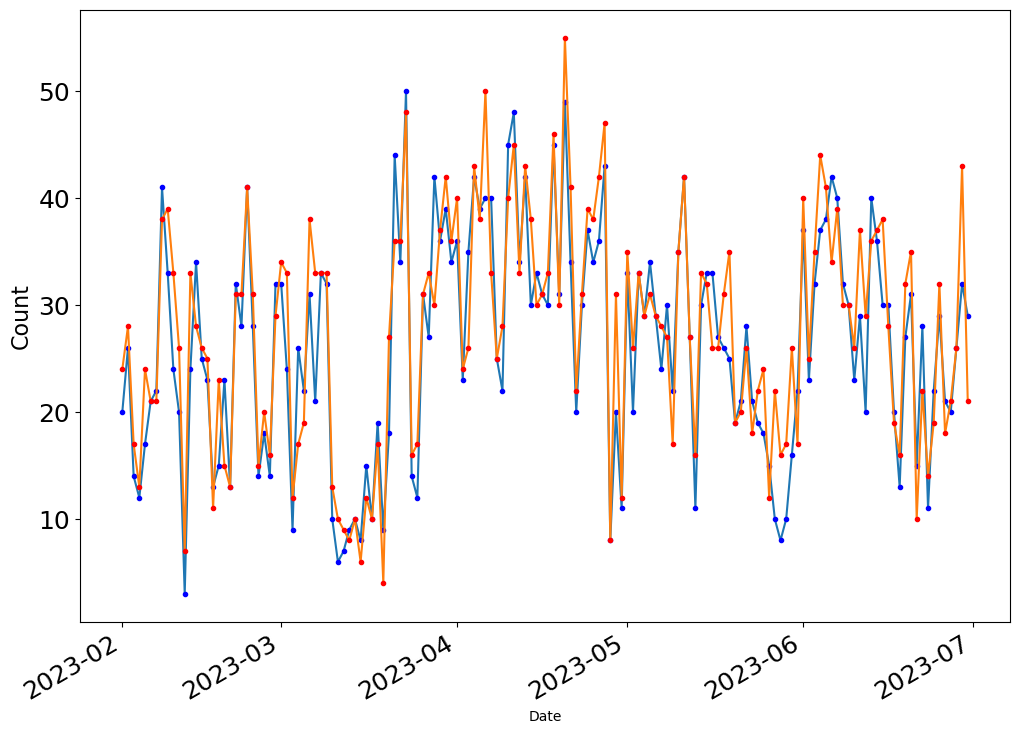

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

## Weather Data

###### Reading the weather data of Washington Dc during 2023

In [10]:
df_weather = pd.read_csv('washington, dc 2023-01-01 to 2023-12-31.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",1/1/2023,61.4,43.5,51.8,61.4,41.7,51.2,46.2,82.2,...,8.7,4,10,2023-01-01T07:26:52,2023-01-01T16:56:42,0.32,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
1,"washington, dc",1/2/2023,63.0,40.0,50.9,63.0,36.3,50.2,44.2,79.3,...,5.7,4,10,2023-01-02T07:26:59,2023-01-02T16:57:31,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
2,"washington, dc",1/3/2023,68.0,50.1,59.3,68.0,50.1,59.3,52.3,78.5,...,3.4,2,10,2023-01-03T07:27:04,2023-01-03T16:58:22,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
3,"washington, dc",1/4/2023,65.0,53.3,59.5,65.0,53.3,59.5,55.0,85.4,...,2.8,2,10,2023-01-04T07:27:07,2023-01-04T16:59:14,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
4,"washington, dc",1/5/2023,64.0,49.6,56.4,64.0,45.1,55.9,46.0,70.4,...,6.0,4,10,2023-01-05T07:27:08,2023-01-05T17:00:08,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."


##### Verifying whether the dataset has any missing values

In [11]:
df_weather.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          224
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

## Check missing values

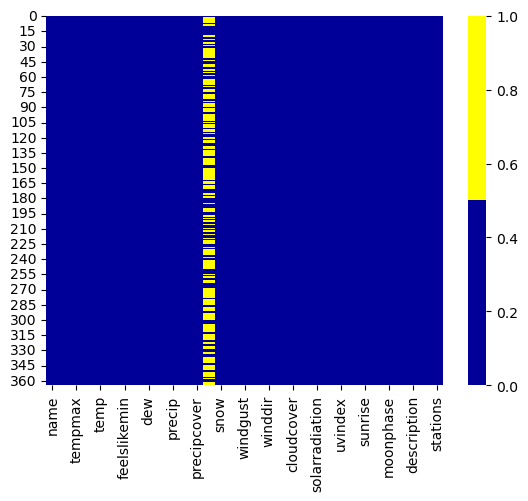

In [12]:
# Date time format 
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

## Selecting variables of our choice
We have decided to keep 8 variables: datetime, temp, humidity, precip, snow, windspeed, visibility, uvindex 

In [13]:
df_weather = df_weather[['datetime','temp', 'humidity', 'precip', 'snow', 'windspeed', 'visibility', 'uvindex']]

In [14]:
df_weather.head()

,datetime,temp,humidity,precip,snow,windspeed,visibility,uvindex
0,2023-01-01,51.8,82.2,0.004,0.0,8.8,9.1,4
1,2023-01-02,50.9,79.3,0.000,0.0,9.1,9.8,4
2,2023-01-03,59.3,78.5,0.000,0.0,17.7,9.7,2
3,2023-01-04,59.5,85.4,0.000,0.0,14.1,9.9,2
4,2023-01-05,56.4,70.4,0.000,0.0,12.6,9.9,4


##### Merging with weather data and removing dates and station name

In [15]:
# pickup data
df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime') 
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])

# dropoff data
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime') 
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])

In [16]:
df_m_pu.head()

,pu_ct,temp,humidity,precip,snow,windspeed,visibility,uvindex
0,20,35.6,59.4,0.043,0.4,15.3,9.1,6
1,26,36.0,59.2,0.000,0.0,11.3,9.9,4
2,14,31.7,43.4,0.000,0.0,28.1,9.9,6
3,12,24.5,37.9,0.000,0.0,16.9,9.9,6
4,17,44.2,42.6,0.000,0.0,17.9,9.9,5


In [17]:
df_m_do.head()

,do_ct,temp,humidity,precip,snow,windspeed,visibility,uvindex
0,24,35.6,59.4,0.043,0.4,15.3,9.1,6
1,28,36.0,59.2,0.000,0.0,11.3,9.9,4
2,17,31.7,43.4,0.000,0.0,28.1,9.9,6
3,13,24.5,37.9,0.000,0.0,16.9,9.9,6
4,24,44.2,42.6,0.000,0.0,17.9,9.9,5


In [18]:
df_m_do.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   do_ct       150 non-null    int64  
 1   temp        150 non-null    float64
 2   humidity    150 non-null    float64
 3   precip      150 non-null    float64
 4   snow        150 non-null    float64
 5   windspeed   150 non-null    float64
 6   visibility  150 non-null    float64
 7   uvindex     150 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 10.5 KB


# 1: visualing and discussing relationships among features: scatterplot matrix

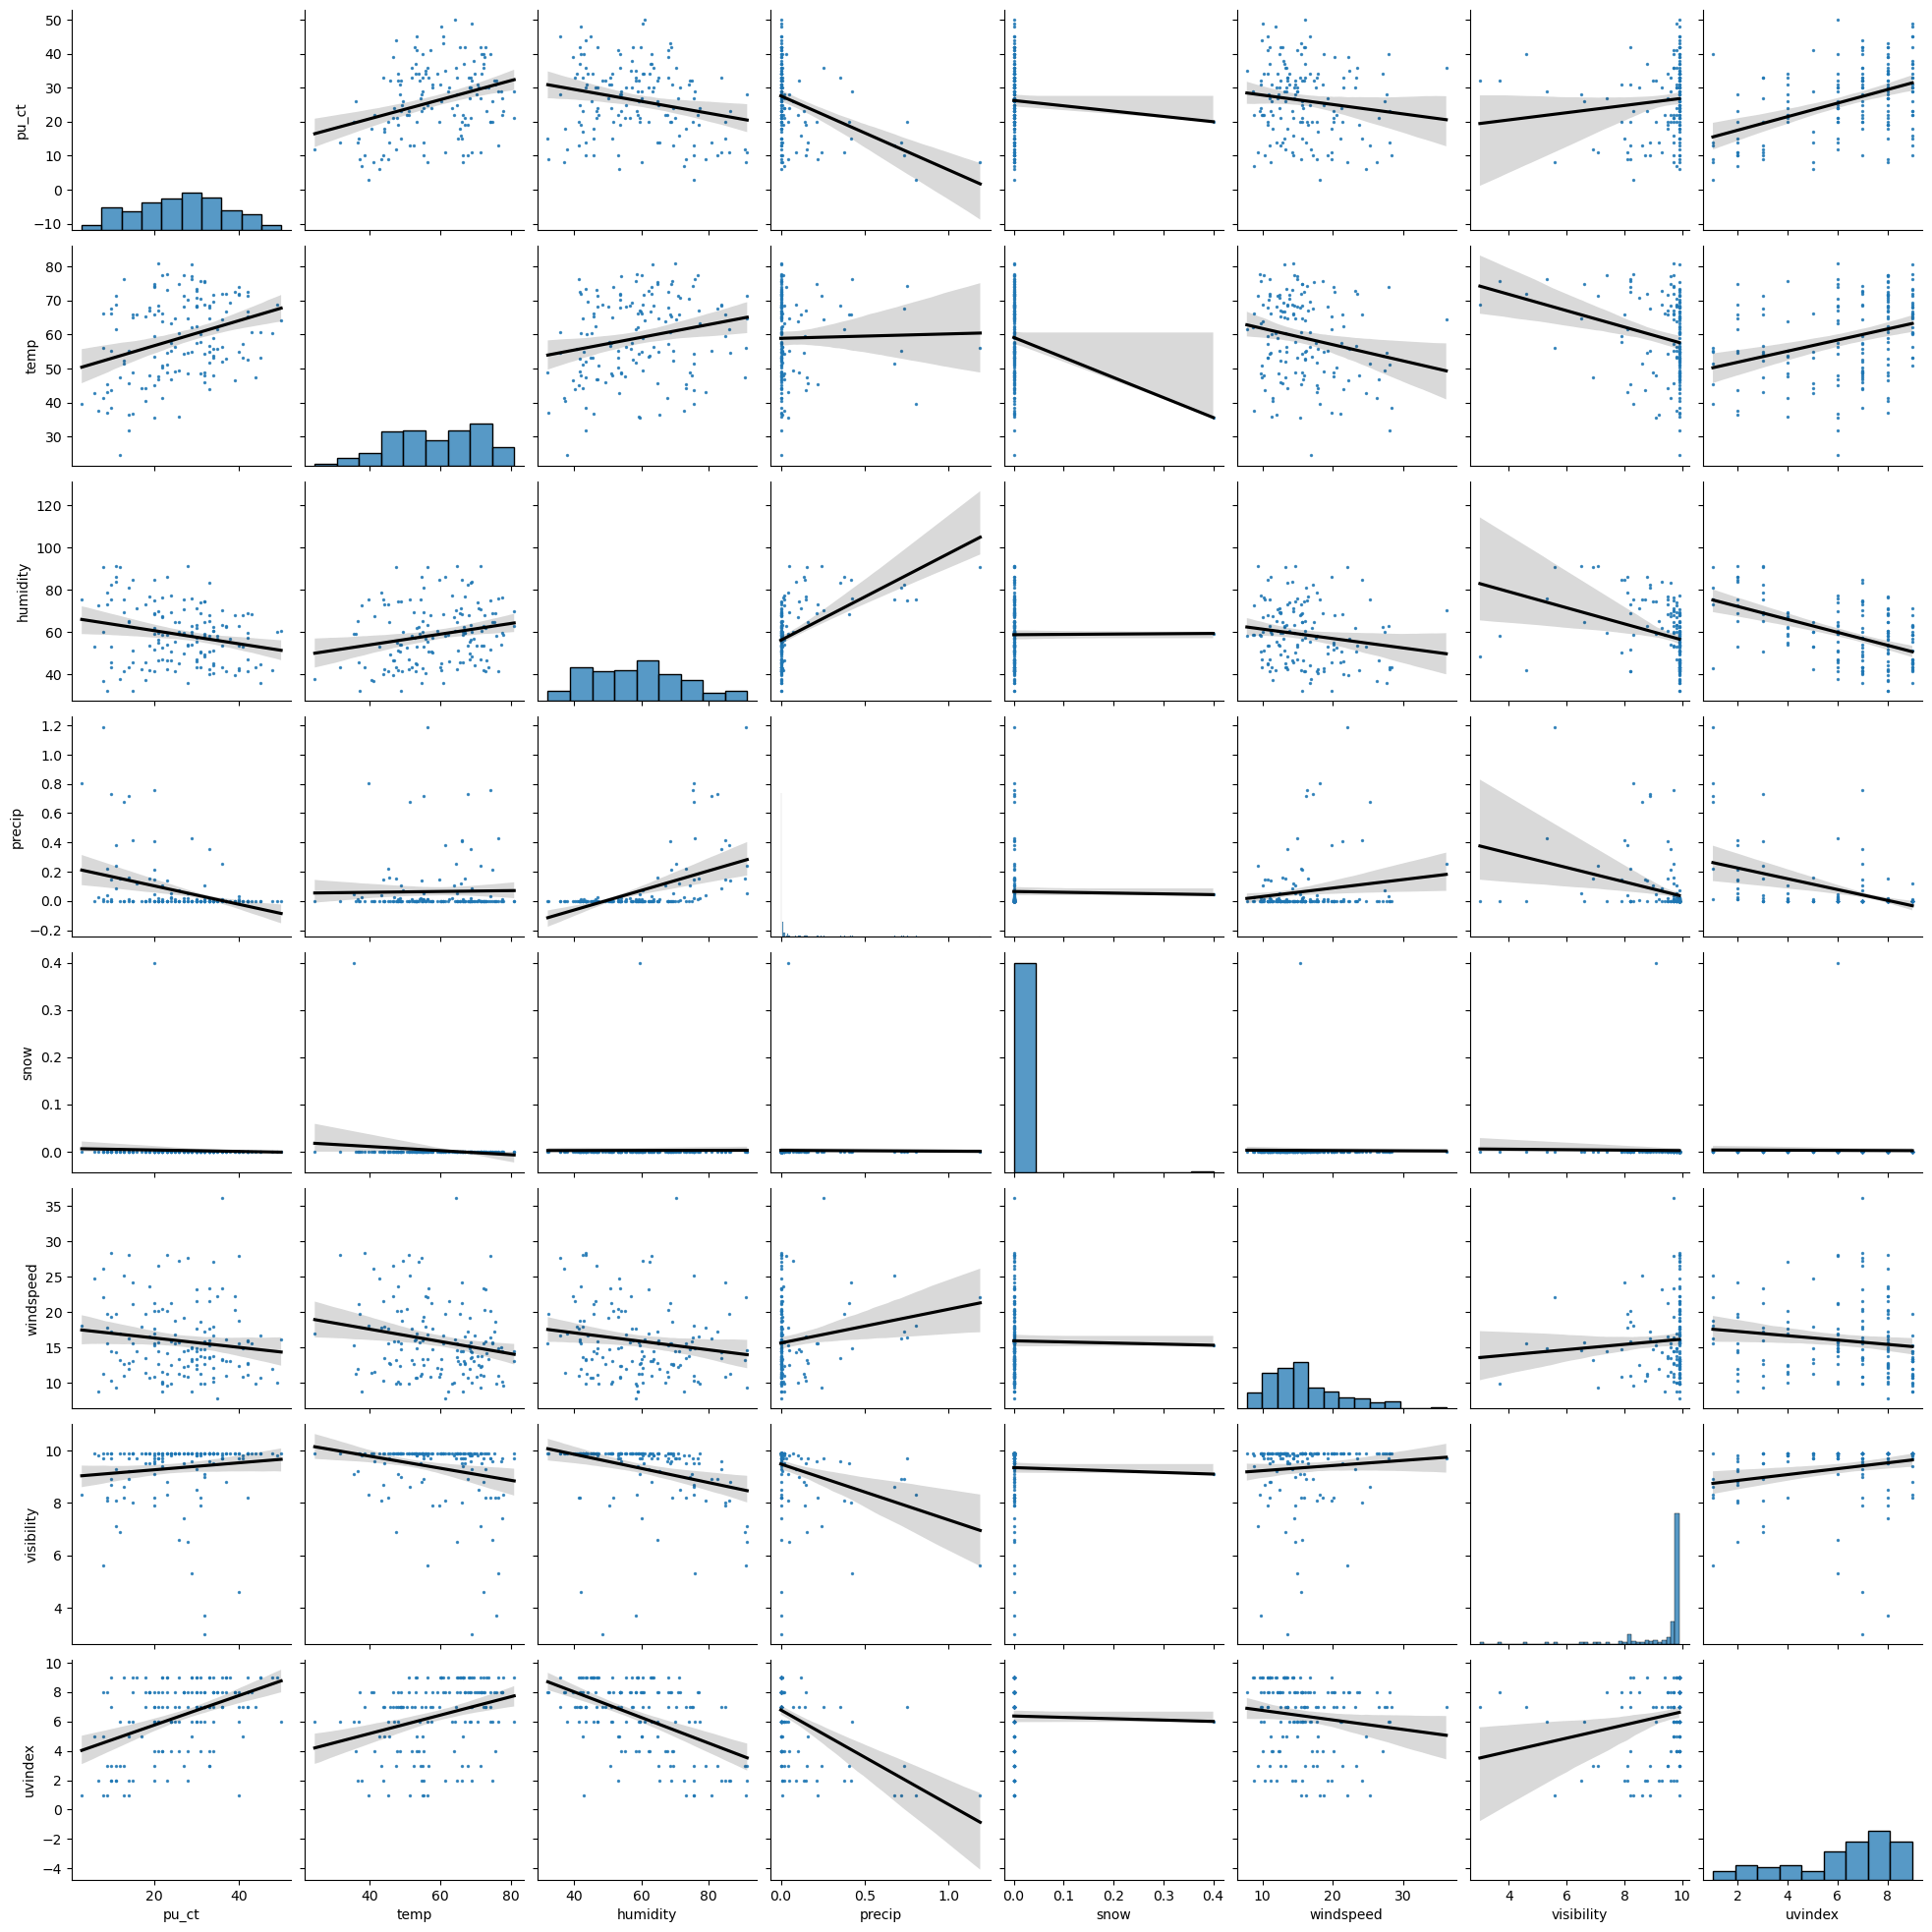

In [19]:
# relationships between weather features and target variable - pu_ct

sns.pairplot(df_m_pu[['pu_ct','temp', 'humidity', 'precip', 'snow', 'windspeed', 'visibility', 'uvindex']], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

#### From the visualizations above, we can see that
#### Relationships between our selected weather features and pick up
#### There is a positive relationship between pick up and temp
#### There is a negative relationship between pick up and humidity
#### There is a negative relationship between pick up and precip
#### There is a not significant relationship between pick up and snow
#### There is a negative relationship between pick up and windspeed
#### There is a positive relationship between pick up and visibility
#### There is a positive relationship between pick up and uvindex

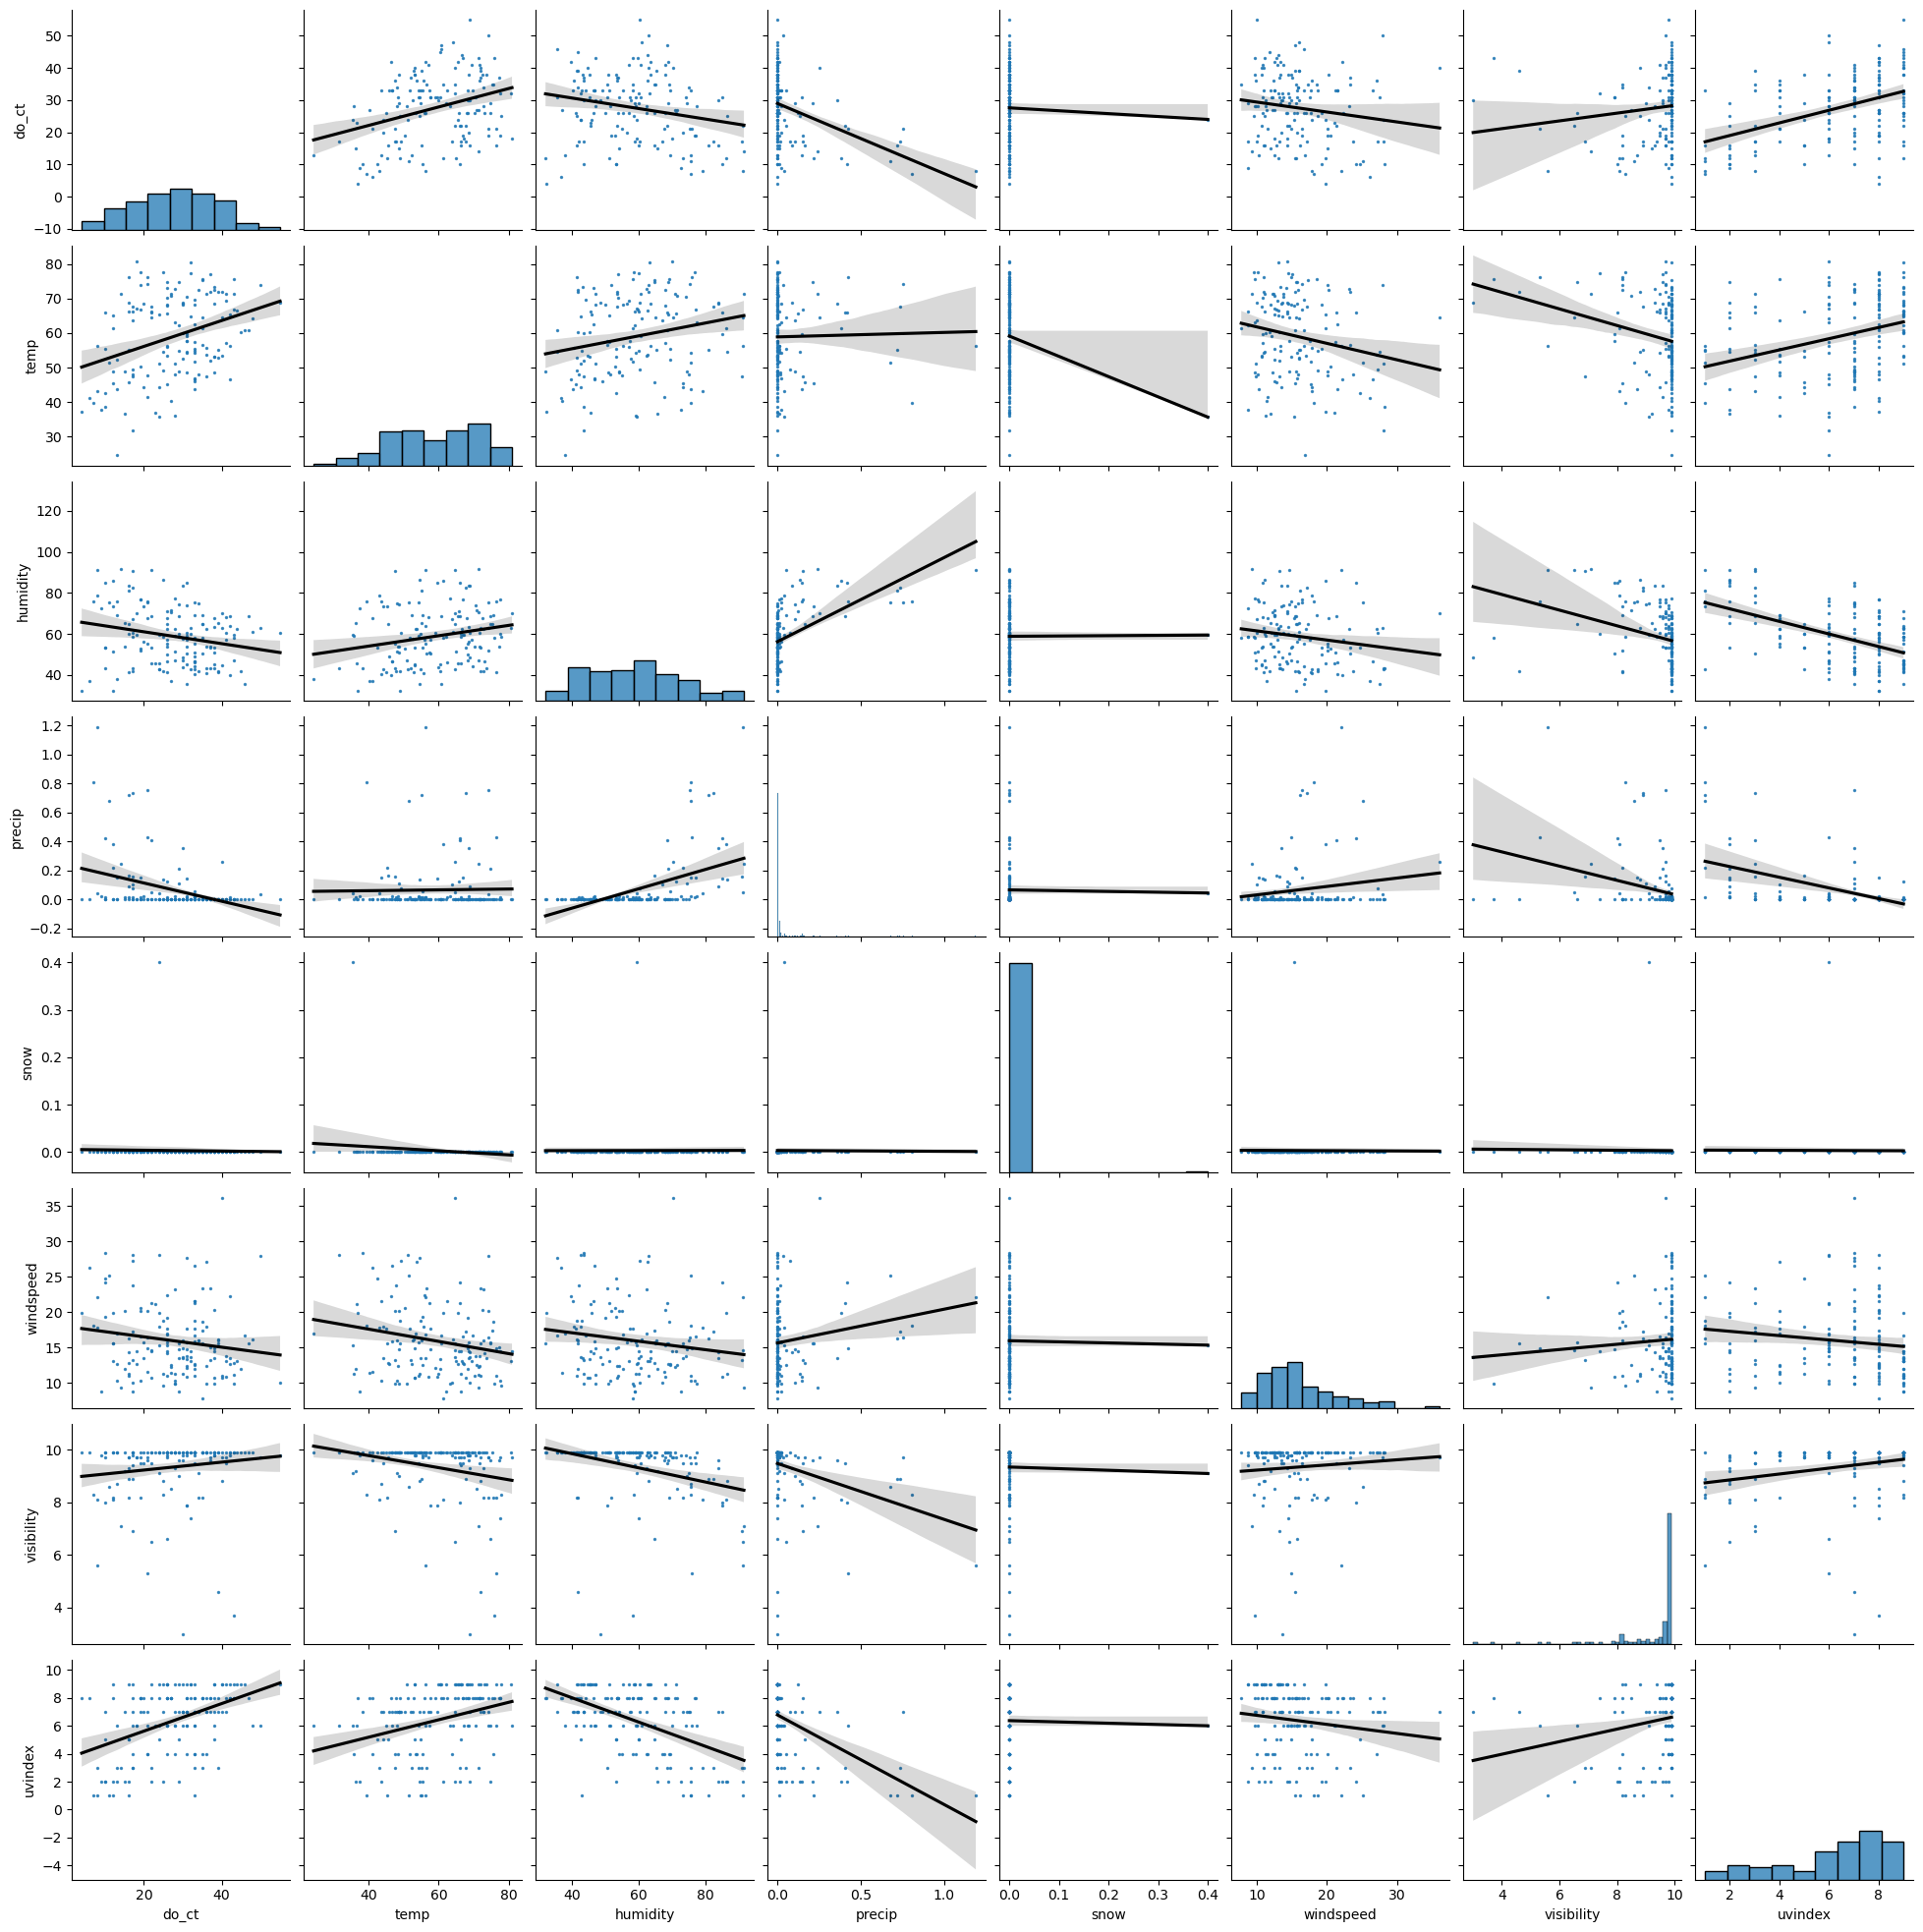

In [20]:
# relationships between weather features and target variable - do_ct

sns.pairplot(df_m_do[['do_ct','temp', 'humidity', 'precip', 'snow', 'windspeed', 'visibility', 'uvindex']], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

#### from the visualizations above, we can see that there Relationships between our selected weather features and drop off
#### There is a positive relationship between drop off and temp
#### There is a negative relationship between drop off and humidity
#### There is a negative relationship between drop off and precip
#### There is a not significant linear relationship between drop off and snow
#### There is a negative relationship between drop off and windspeed
#### There is a positive relationship between drop off and visibility
#### There is a positive relationship between drop off and uvindex

# Prepare training data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,temp,humidity,precip,snow,windspeed,visibility,uvindex
0,35.6,59.4,0.043,0.4,15.3,9.1,6
1,36.0,59.2,0.000,0.0,11.3,9.9,4
2,31.7,43.4,0.000,0.0,28.1,9.9,6
3,24.5,37.9,0.000,0.0,16.9,9.9,6
4,44.2,42.6,0.000,0.0,17.9,9.9,5


In [23]:
## output all data types 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        150 non-null    float64
 1   humidity    150 non-null    float64
 2   precip      150 non-null    float64
 3   snow        150 non-null    float64
 4   windspeed   150 non-null    float64
 5   visibility  150 non-null    float64
 6   uvindex     150 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 9.4 KB


## Spliting into training and test

In [24]:
# 60% test data
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.6, random_state = 200)

In [25]:
X_train.columns

Index(['temp', 'humidity', 'precip', 'snow', 'windspeed', 'visibility',
       'uvindex'],
      dtype='object')

In [26]:
X_test.columns

Index(['temp', 'humidity', 'precip', 'snow', 'windspeed', 'visibility',
       'uvindex'],
      dtype='object')

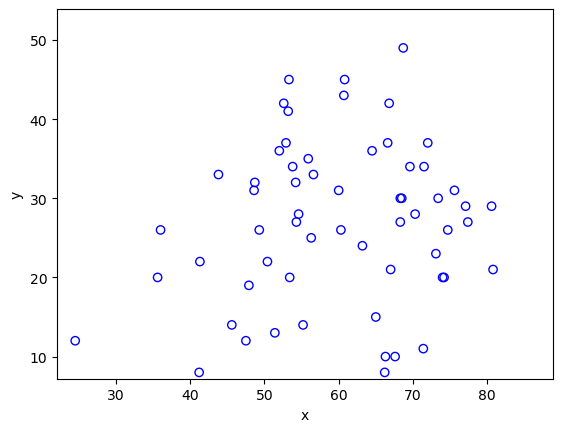

In [27]:
import matplotlib.pyplot as plt
x=X_train['temp']
y=y_train
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(xmin=np.min(x)*0.9,xmax=np.max(x)*1.1)
plt.ylim(ymin=np.min(y)*0.9,ymax=np.max(y)*1.1)
plt.scatter(x,y, marker='o', facecolors='none', edgecolors='blue')

## 2: Linear Regression series, incorporating additional features

## Pickup Models

## Model 1

In [28]:
## training data 

linear_regressor_pu1 = LinearRegression()
linear_regressor_pu1.fit(X_train[['temp']], y_train) 
print(pd.Series(linear_regressor_pu1.coef_.flatten(), index=X_train[['temp']].columns))
y_pred = linear_regressor_pu1.predict(X_train[['temp']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp    0.117668
dtype: float64
MSE in training data is 98.177


In [29]:
## test data 

y_pred = linear_regressor_pu1.predict(X_test[['temp']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 104.497


## Model 2

In [30]:
## training data 

linear_regressor_pu2 = LinearRegression()
linear_regressor_pu2.fit(X_train[['temp','humidity' ]], y_train) 
print(pd.Series(linear_regressor_pu2.coef_.flatten(), index=X_train[['temp','humidity']].columns))
y_pred = linear_regressor_pu2.predict(X_train[['temp','humidity']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp        0.162355
humidity   -0.222588
dtype: float64
MSE in training data is 90.026


In [31]:
## test data 

y_pred = linear_regressor_pu2.predict(X_test[['temp','humidity']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 92.984


## Model 3

In [32]:
## training data 

linear_regressor_pu3 = LinearRegression()
linear_regressor_pu3.fit(X_train[['temp','humidity','precip']], y_train) 
print(pd.Series(linear_regressor_pu3.coef_.flatten(), index=X_train[['temp','humidity','precip']].columns))
y_pred = linear_regressor_pu3.predict(X_train[['temp','humidity','precip']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp         0.140706
humidity    -0.075890
precip     -18.679303
dtype: float64
MSE in training data is 81.87


In [33]:
## test data 

y_pred = linear_regressor_pu3.predict(X_test[['temp','humidity','precip']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 86.97


## Model 4

In [35]:
## training data 

linear_regressor_pu4 = LinearRegression()
linear_regressor_pu4.fit(X_train[['temp','humidity','precip','snow' ]], y_train) 
print(pd.Series(linear_regressor_pu4.coef_.flatten(), index=X_train[['temp','humidity','precip','snow']].columns))
y_pred = linear_regressor_pu4.predict(X_train[['temp','humidity','precip','snow']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp         0.127885
humidity    -0.071686
precip     -18.871243
snow       -10.948383
dtype: float64
MSE in training data is 81.579


In [36]:
## test data 

y_pred = linear_regressor_pu4.predict(X_test[['temp','humidity','precip','snow']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 88.22


## Model 5

In [37]:
## training data 

linear_regressor_pu5 = LinearRegression()
linear_regressor_pu5.fit(X_train[['temp','humidity','precip','snow','windspeed']], y_train) 
print(pd.Series(linear_regressor_pu5.coef_.flatten(), index=X_train[['temp','humidity','precip','snow','windspeed']].columns))
y_pred = linear_regressor_pu5.predict(X_train[['temp','humidity','precip','snow','windspeed']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp          0.132811
humidity     -0.062845
precip      -19.562849
snow        -10.569891
windspeed     0.067863
dtype: float64
MSE in training data is 81.468


In [38]:
## test data 

y_pred = linear_regressor_pu5.predict(X_test[['temp','humidity','precip','snow','windspeed']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 88.846


## Model 6

In [39]:
## training data 

linear_regressor_pu6 = LinearRegression()
linear_regressor_pu6.fit(X_train[['temp','humidity','precip','snow','windspeed','visibility']], y_train) 
print(pd.Series(linear_regressor_pu6.coef_.flatten(), index=X_train[['temp','humidity','precip','snow','windspeed','visibility']].columns))
y_pred = linear_regressor_pu6.predict(X_train[['temp','humidity','precip','snow','windspeed','visibility']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp           0.167185
humidity       0.053278
precip       -20.295913
snow          -5.224568
windspeed      0.090514
visibility     3.526193
dtype: float64
MSE in training data is 76.213


In [40]:
## test data 

y_pred = linear_regressor_pu6.predict(X_test[['temp','humidity','precip','snow','windspeed','visibility']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 112.04


## Model 7

In [41]:
## training data 

linear_regressor_pu7 = LinearRegression()
linear_regressor_pu7.fit(X_train[['temp','humidity','precip','snow','windspeed','visibility','uvindex' ]], y_train) 
print(pd.Series(linear_regressor_pu7.coef_.flatten(), index=X_train[['temp','humidity','precip','snow','windspeed','visibility','uvindex']].columns))
y_pred = linear_regressor_pu7.predict(X_train[['temp','humidity','precip','snow','windspeed','visibility','uvindex']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp           0.048277
humidity       0.184877
precip       -17.431431
snow         -10.973925
windspeed      0.147122
visibility     2.913784
uvindex        1.484272
dtype: float64
MSE in training data is 72.404


In [42]:
## test data 

y_pred = linear_regressor_pu7.predict(X_test[['temp','humidity','precip','snow','windspeed','visibility','uvindex']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 108.37


## MSE comparasion for Pickup

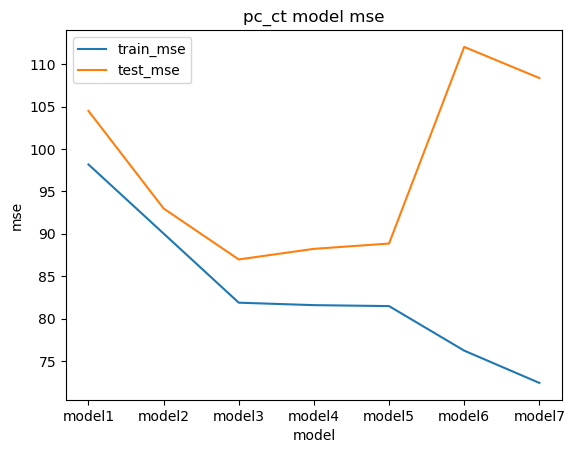

In [43]:
model = ['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7']
train_mse = [98.177, 90.026, 81.87, 81.579, 81.468, 76.213, 72.404]
test_mse = [104.497, 92.984, 86.97, 88.22, 88.846, 112.04, 108.37]

plt.plot(model, train_mse, label = 'train_mse')
plt.plot(model, test_mse, label = 'test_mse')

plt.xlabel('model')
plt.ylabel('mse')
plt.title('pc_ct model mse')

plt.legend()

## Dropoff Models

In [44]:
## drop off
y = df_m_do['do_ct']
X = df_m_do.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,temp,humidity,precip,snow,windspeed,visibility,uvindex
0,35.6,59.4,0.043,0.4,15.3,9.1,6
1,36.0,59.2,0.000,0.0,11.3,9.9,4
2,31.7,43.4,0.000,0.0,28.1,9.9,6
3,24.5,37.9,0.000,0.0,16.9,9.9,6
4,44.2,42.6,0.000,0.0,17.9,9.9,5


## Split into training and test

In [45]:
# 60% test data
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.6, random_state = 200)

In [46]:
X_train.columns

Index(['temp', 'humidity', 'precip', 'snow', 'windspeed', 'visibility',
       'uvindex'],
      dtype='object')

In [47]:
X_test.columns

Index(['temp', 'humidity', 'precip', 'snow', 'windspeed', 'visibility',
       'uvindex'],
      dtype='object')

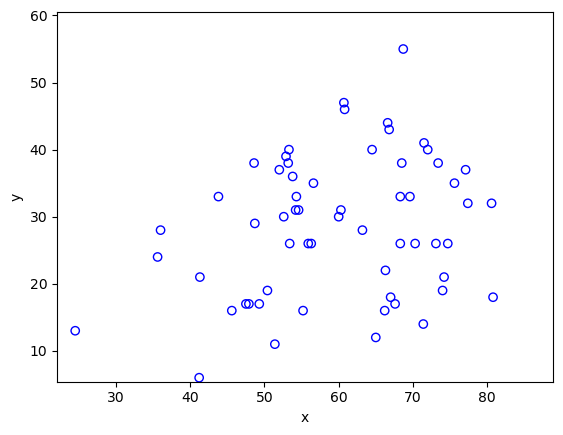

In [48]:
import matplotlib.pyplot as plt
x=X_train['temp']
y=y_train
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(xmin=np.min(x)*0.9,xmax=np.max(x)*1.1)
plt.ylim(ymin=np.min(y)*0.9,ymax=np.max(y)*1.1)
plt.scatter(x,y, marker='o', facecolors='none', edgecolors='blue')

## Model 1

In [49]:
## training data 

linear_regressor_do1 = LinearRegression()
linear_regressor_do1.fit(X_train[['temp']], y_train)
print(pd.Series(linear_regressor_do1.coef_.flatten(), index=X_train[['temp']].columns))
y_pred = linear_regressor_do1.predict(X_train[['temp']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp    0.216716
dtype: float64
MSE in training data is 99.625


In [50]:
## test data 

y_pred = linear_regressor_do1.predict(X_test[['temp']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 98.956


## Model 2

In [51]:
## training data 

linear_regressor_do2 = LinearRegression()
linear_regressor_do2.fit(X_train[['temp','humidity']], y_train) 
print(pd.Series(linear_regressor_do2.coef_.flatten(), index=X_train[['temp','humidity']].columns))
y_pred = linear_regressor_do2.predict(X_train[['temp','humidity']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp        0.255044
humidity   -0.190916
dtype: float64
MSE in training data is 93.629


In [52]:
## test data 

y_pred = linear_regressor_do2.predict(X_test[['temp','humidity']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 87.279


## Model 3

In [53]:
## training data 

linear_regressor_do3 = LinearRegression()
linear_regressor_do3.fit(X_train[['temp','humidity','precip']], y_train) 
print(pd.Series(linear_regressor_do3.coef_.flatten(), index=X_train[['temp','humidity','precip']].columns))
y_pred = linear_regressor_do3.predict(X_train[['temp','humidity','precip']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp         0.232692
humidity    -0.039453
precip     -19.286011
dtype: float64
MSE in training data is 84.934


In [54]:
## test data 

y_pred = linear_regressor_do3.predict(X_test[['temp','humidity','precip']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 81.422


## Model 4

In [55]:
## training data 

linear_regressor_do4 = LinearRegression()
linear_regressor_do4.fit(X_train[['temp','humidity','precip','snow' ]], y_train) 
print(pd.Series(linear_regressor_do4.coef_.flatten(), index=X_train[['temp','humidity','precip','snow']].columns))
y_pred = linear_regressor_do4.predict(X_train[['temp','humidity','precip','snow']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp         0.234707
humidity    -0.040114
precip     -19.255843
snow         1.720801
dtype: float64
MSE in training data is 84.927


In [56]:
## test data 

y_pred = linear_regressor_do4.predict(X_test[['temp','humidity','precip','snow']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 81.302


## Model 5

In [57]:
## training data 

linear_regressor_do5 = LinearRegression()
linear_regressor_do5.fit(X_train[['temp','humidity','precip','snow','windspeed']], y_train) 
print(pd.Series(linear_regressor_do5.coef_.flatten(), index=X_train[['temp','humidity','precip','snow','windspeed']].columns))
y_pred = linear_regressor_do5.predict(X_train[['temp','humidity','precip','snow','windspeed']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp          0.226198
humidity     -0.055384
precip      -18.061324
snow          1.067080
windspeed    -0.117210
dtype: float64
MSE in training data is 84.596


In [58]:
## test data 

y_pred = linear_regressor_do5.predict(X_test[['temp','humidity','precip','snow','windspeed']])
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE in test data is {mse}")

MSE in test data is 81.12


## Model 6

In [60]:
## training data 
linear_regressor_do6 = LinearRegression()
linear_regressor_do6.fit(X_train[['temp','humidity','precip','snow','windspeed','visibility']], y_train)
print(pd.Series(linear_regressor_do6.coef_.flatten(), index=X_train[['temp','humidity','precip','snow','windspeed','visibility']].columns))
y_pred = linear_regressor_do6.predict(X_train[['temp','humidity','precip','snow','windspeed','visibility']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp           0.260180
humidity       0.059420
precip       -18.786058
snow           6.351657
windspeed     -0.094816
visibility     3.486120
dtype: float64
MSE in training data is 79.46


In [61]:
## test data 

y_pred = linear_regressor_do6.predict(X_test[['temp','humidity','precip','snow','windspeed','visibility']])
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE in test data is {mse}")

MSE in test data is 98.603


## Model 7

In [62]:
## training data 
linear_regressor_do7 = LinearRegression()
linear_regressor_do7.fit(X_train[['temp','humidity','precip','snow','windspeed','visibility','uvindex' ]], y_train) 
print(pd.Series(linear_regressor_do7.coef_.flatten(), index=X_train[['temp','humidity','precip','snow','windspeed','visibility','uvindex']].columns))
y_pred = linear_regressor_do7.predict(X_train[['temp','humidity','precip','snow','windspeed','visibility','uvindex']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

temp           0.186223
humidity       0.141270
precip       -17.004440
snow           2.775737
windspeed     -0.059608
visibility     3.105220
uvindex        0.923171
dtype: float64
MSE in training data is 77.986


In [63]:
## test data 

y_pred = linear_regressor_do7.predict(X_test[['temp','humidity','precip','snow','windspeed','visibility','uvindex']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 94.955


## MSE comparasion

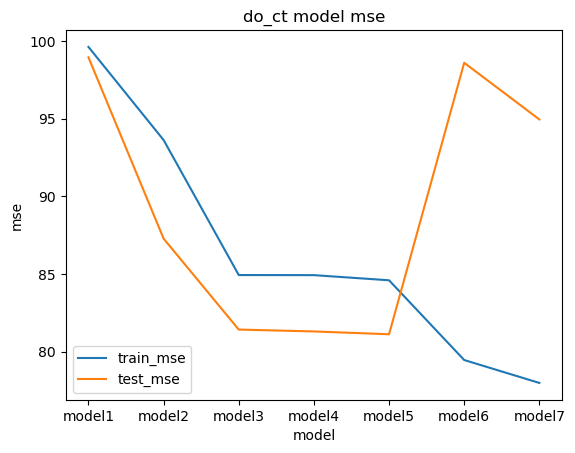

In [64]:
model = ['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7']
train_mse = [99.625, 93.629, 84.934, 84.927, 84.596, 79.46, 77.986]
test_mse = [98.956, 87.279, 81.422, 81.302, 81.12, 98.603, 94.955]

plt.plot(model, train_mse, label = 'train_mse')
plt.plot(model, test_mse, label = 'test_mse')

plt.xlabel('model')
plt.ylabel('mse')
plt.title('do_ct model mse')

plt.legend()

## 3. Determining the best models based on MSE

The best model for pick up is model 3 ('temp','humidity','precip') , with a test mse of 86.97

The best model for drop off are model 5 ('temp','humidity','precip','snow','windspeed'), with a test mse of 81.12

## 4.  Illustrating the computation of the predicted pu_ct and do_ct using the chosen models

In [65]:
## pick up 

first_test_instance = X_test[['temp','humidity','precip']].iloc[[0]]
predicted_value = linear_regressor_pu3.predict(first_test_instance)
print(f"Predicted pick up for the first instance in the pu3 model test data: {round(predicted_value[0],2)}")

Predicted pick up for the first instance in the pu3 model test data: 27.18


In [66]:
## drop off 

first_test_instance = X_test[['temp','humidity','precip','snow','windspeed']].iloc[[0]]
predicted_value = linear_regressor_do5.predict(first_test_instance)
print(f"Predicted drop off for the first instance in the do5 model test data: {round(predicted_value[0],2)}")

Predicted drop off for the first instance in the do5 model test data: 28.82


## 5. Using the predicted pu_ct and do_ct for X_test.iloc[0,:] as an example, discuss the optimal number of bikes and docks to allocate for the station at GWSB 

#### Capital Bikeshare should take into account Temperature, humidity, precip, snow, and windspeed when placing or leaving bikes at this location.  
#### The predicted drop-off and pick-up counts (28.82 and 27.18) show that we need to manage bikes and docks efficiently at 22nd and H Street Station. 
#### There a small excess in predicted drop-offs over pick-ups. At this station there are 17 docks available. 


#### Assumptions:

- Penalty for unsuccessful pickup: $8
- Penalty for unsuccessful drop-off: $25

#### Updated Predicted Values:

- Predicted pick-up for the first instance in the pu3 model test data: 27 (rounded off)
- Predicted drop-off for the first instance in the do5 model test data: 29 (rounded off)

#### Calculation:

1. **Calculate Penalty Costs:**
    - Penalty for unsuccessful pickups: $8 * (Predicted pick-up - Available docks)
    - Penalty for unsuccessful drop-offs: $25 * (Predicted drop-off - Available docks)

2. **Substitute values:**
    - Penalty for unsuccessful pickups = $8 * (27 - 17) = $8 * 10 = $80
    - Penalty for unsuccessful drop-offs = $25 * (29 - 17) = $25 * 12 = $300

3. **Compare Penalty Costs:**
    - Since the penalty for unsuccessful drop-offs is higher ($300 > $80), the optimal decision is to allocate more docks.

#### Optimal Decision:

- Given the rounded predicted values and penalty costs, it is advisable to allocate more docks than bikes at the station to minimize the total penalty cost.

#### Optimal Allocation:

- Allocate 17 docks for drop-offs.
- Allocate a reduced number of bikes for pick-ups to match the available docks and avoid additional penalties.

#### Objective for Capital Bikeshare:

- The objective is to minimize the total penalty cost associated with unsuccessful pickups and drop-offs. This approach aligns with the assumption that the cost of unsuccessful drop-offs is more significant than unsuccessful pickups, based on the assigned dollar values.

#### Business Use:

- Suppose we have 20 predicted pickups and 20 predicted drop-offs, but only 17 available slots. By assigning penalties of $8 for unsuccessful pickups and $25 for unsuccessful drop-offs, the optimal decision would be to allocate more docks to minimize the higher penalty associated with unsuccessful drop-offs.

- As the operations manager, this approach ensures efficient resource utilization and aligns with the goal of minimizing costs associated with unmet demand. The specific dollar values and penalties may vary based on further analysis and feedback from stakeholders.
